Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


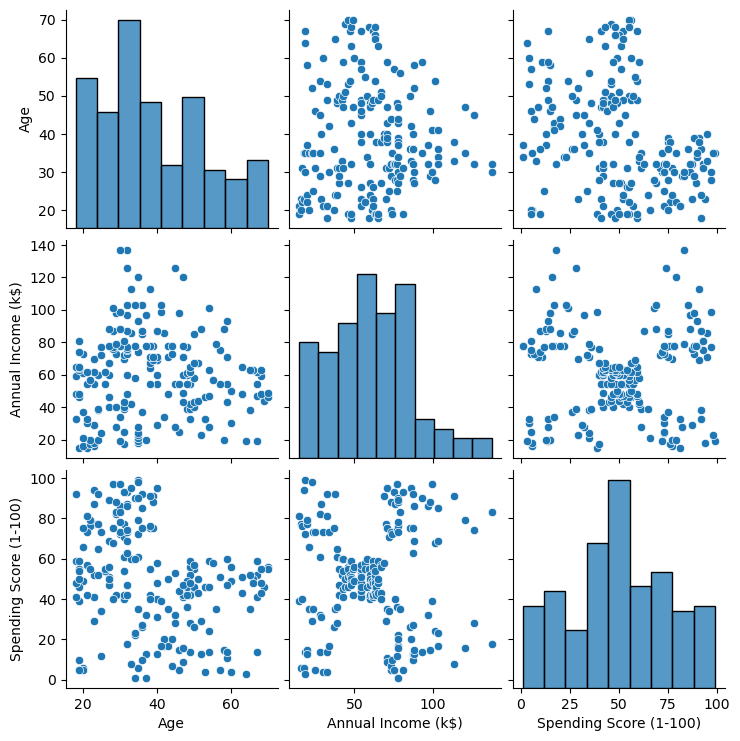

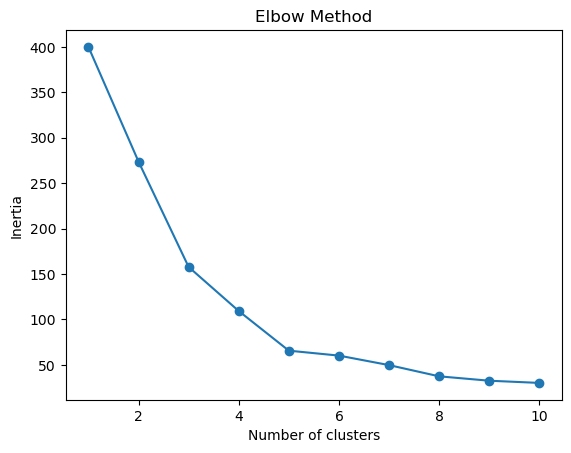

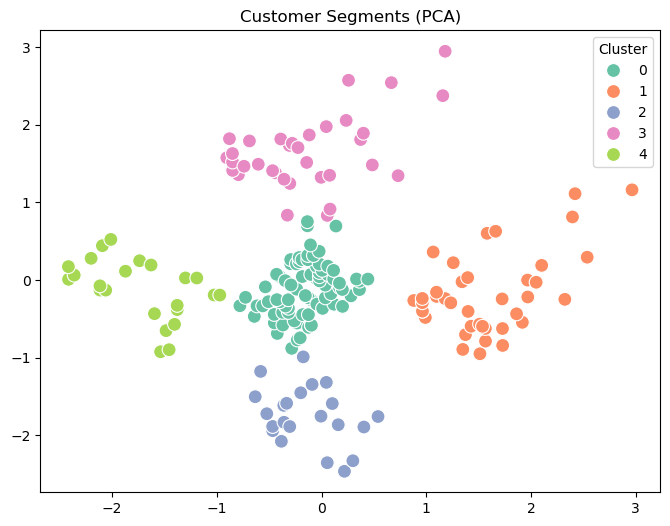


Cluster 0 Summary:
Number of customers: 81
Average Annual Income: 55.2962962962963
Average Spending Score: 49.51851851851852

Cluster 1 Summary:
Number of customers: 39
Average Annual Income: 86.53846153846153
Average Spending Score: 82.12820512820512

Cluster 2 Summary:
Number of customers: 22
Average Annual Income: 25.727272727272727
Average Spending Score: 79.36363636363636

Cluster 3 Summary:
Number of customers: 35
Average Annual Income: 88.2
Average Spending Score: 17.114285714285714

Cluster 4 Summary:
Number of customers: 23
Average Annual Income: 26.304347826086957
Average Spending Score: 20.91304347826087


In [4]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")


!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv("Mall_Customers.csv")
print("Shape:", df.shape)
print(df.head())

sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

X = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2', s=100)
plt.title("Customer Segments (PCA)")
plt.show()

for i in range(k):
    cluster_data = df[df['Cluster']==i]
    print(f"\nCluster {i} Summary:")
    print("Number of customers:", len(cluster_data))
    print("Average Annual Income:", cluster_data['Annual Income (k$)'].mean())
    print("Average Spending Score:", cluster_data['Spending Score (1-100)'].mean())
